In [284]:
import pandas as pd 
import numpy as np 
from langdetect import detect

## Get data

In [295]:
#data = pd.read_excel('List_Songs-HIPPOP.xlsx')
data = pd.read_csv('List_Songs-ROCKHIP_new.csv') #,lineterminator='\n')
#data = data[['Lyrics', 'Title', 'Year', 'Genre']][3000:]

In [318]:
#print(data['Lyrics'].loc[(data['Genre'] == 'Reggae') & (data['Lyrics'] != 'NONE')].head(5))
#print(data['Lyrics'].loc[(data['Genre'] == 'Hip Hop') & (data['Lyrics'] != 'NONE')].head(5))
#data.head()

,Unnamed: 0,Lyrics,Title,Year,Genre,Language,Year_decade,Hip Hop,Rock
4800,4800,"[uh, uh, uh, bring, attention, dirty, watch, t...",#1,2002,Hip Hop,en,2000,1,0
4801,4801,"[chorus, 2x):(mannie, fresh, niggas, buck, buc...",#1,2002,Hip Hop,en,2000,1,0
4802,4802,"[rich, nice, want, understand, mackin, big, bu...",#1 Player,1995,Hip Hop,en,1990,1,0
4803,4803,"[nigga, stunt, come, f*ckin, car, nigga, belie...",#1 Stunna,2000,Hip Hop,en,2000,1,0
4804,4804,"[girl, birthday, birthday, tonight, tonight, g...",#BDAY,2000,Hip Hop,en,2000,1,0


# Overview of the rows that are dropped

In [297]:

print('Initial number of songs', len(data))

data1 = data[data.Lyrics != 'NONE']

print('After removal of songs with no lyrics' , len(data1))

data2 = data1.loc[data1['Lyrics'].apply(detect) == 'en']
print('Number of remaining songs that are in English', len(data2))
 
# Split into two dataframes by genre    
pop_df = data2[['Lyrics','Title','Year']].loc[data2['Genre'] == 'Reggae']
hiphop_df = data2[['Lyrics','Title','Year']].loc[data2['Genre'] == 'Hip Hop']

# Inner join to get the songs that are in both
df12 = pd.merge(hiphop_df,pop_df, on=['Title','Year','Lyrics'], how='inner')     #extract common rows with merge
final_hiphop = hiphop_df[~hiphop_df['Lyrics'].isin(df12['Lyrics'])]
final_pop = pop_df[~pop_df['Lyrics'].isin(df12['Lyrics'])]

print('Number of songs that are in both genres (and thus removed twice)',len(df12))

final_hiphop.head(100)

Initial number of songs 9600
After removal of songs with no lyrics 6727
Number of remaining songs that are in English 6103
Number of songs that are in both genres (and thus removed twice) 0


,Lyrics,Title,Year
4800,Uh uh uh\nI just gotta bring it to they attent...,#1,2002
4801,\n\nChorus (2x):(Mannie Fresh)\nAll the nigga...,#1,2002
4802,[Rich Nice] What I want you to understand is...,#1 Player,1995
4803,Nigga can't out-stunt me when it come to these...,#1 Stunna,2000
4804,Girl it's your birthday (birthday) in here (in...,#BDAY,NONE
4805,Grind mode grind mode bitch I'm on grind mode\...,#Grindmode,NONE
4807,S'all you got?\nS'all you got?\nThat's all you...,#STUPiDFACEDD,2011
4808,Big man! When I talk hear weh yuh fi do?\nShut...,#Twerkit,NONE
4809,People killin' people dyin' Children hurtin' I...,#WHERESTHELOVE,2016
4810,Rich girl and you've come to far 'cause you kn...,$$$ Girlz,2004


# Data tidying function

In [298]:
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [300]:
def tidy_data(df):
    start_len = len(df)
    ### Function that takes as input the dataframe and outputs the clean dataframe 
    
    # Drop rows where Lyrics = None
    df = df[df.Lyrics != 'NONE']
    
    # Detect language and drop all rows where language is not English
    df['Language'] = df['Lyrics'].apply(detect)
    df = df.loc[df['Language'] == 'en']
    #df = df.drop(['Language'], axis=1)
    
    print('Number of songs before dropping duplicates', len(df)) 
    
    # Find lyrics that are in both genres and remove them both 
    # Split into two dataframes by genre    
    pop_df = data2[['Lyrics','Title','Year']].loc[data2['Genre'] == 'Pop']
    hiphop_df = data2[['Lyrics','Title','Year']].loc[data2['Genre'] == 'Hip Hop']

    # Inner join to get the songs that are in both
    df12 = pd.merge(hiphop_df,pop_df, on=['Title','Year','Lyrics'], how='inner')     #extract common rows with merge
    final_hiphop = hiphop_df[~hiphop_df['Lyrics'].isin(df12['Lyrics'])]
    final_pop = pop_df[~pop_df['Lyrics'].isin(df12['Lyrics'])]
    
    #Combine
    hiphop_pop_concat = pd.concat([final_hiphop,final_pop])
    
    #Put 'Genres' back on
    final_df = pd.merge(hiphop_pop_concat,pd.DataFrame(df[['Lyrics','Genre']]),on='Lyrics',how='left')
    
    #df = df.drop_duplicates(subset=['Lyrics', 'Title', 'Year'], keep=False)
    #print('Number of songs after dropping genre duplicates', len(df)) 
    final_df = df.drop_duplicates()
    print('Number of songs after dropping actual duplicates', len(final_df))
    
    #Apply tokenizer
    final_df['Lyrics'] = final_df['Lyrics'].apply(spacy_tokenizer)
    
    # Remove None values create decade column and 
    final_df['Year'] = final_df['Year'].replace('NONE',None)
    final_df['Title'] = final_df['Title'].replace('NONE',None)
    final_df['Lyrics'] = final_df['Lyrics'].replace('\n',' ')
    final_df['Year_decade'] = pd.to_numeric(final_df['Year'])//10*10
  
    # Get genre dummies 
    dummy=pd.get_dummies(final_df["Genre"])
    final_df = pd.concat([final_df, dummy], axis=1)
    
    tidied_len = len(final_df)
    print('Function removed', start_len - tidied_len, 'out of', start_len, 'rows')
    
    return final_df #(df)

In [301]:
data = tidy_data(data)
data.head(10)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Number of songs before dropping duplicates 6103
Number of songs after dropping actual duplicates 6103
Function removed 3497 out of 9600 rows


,Unnamed: 0,Lyrics,Title,Year,Genre,Language,Year_decade,Hip Hop,Rock
2,2,"[wait, patiently, lord, incline, hear, cry, br...","""40""",1991,Rock,en,1990,0,1
3,3,"[wait, patiently, lord, incline, hear, cry, br...","""40""",1987,Rock,en,1980,0,1
4,4,"[sing, 40, waited, patiently, lord, inclined, ...","""40""",1983,Rock,en,1980,0,1
8,8,"[hand, look, 'em, shake, song, repeat, drop, n...","""45""",2012,Rock,en,2010,0,1
9,9,"[love, line, straight, narrow, love, try, true...","""5150""",1986,Rock,en,1980,0,1
14,14,"[street, pave, blood, cataclysmic, overtone, f...","""A"" Bomb in Wardour Street",2016,Rock,en,2010,0,1
16,16,"[life, strange, know, head, new, worth, live, ...","""D"" Train",1989,Rock,en,1980,0,1
17,17,"[eat, sleep, breathe, anymore, sleep, count, s...","""Do You Sleep""",2008,Rock,en,2000,0,1
18,18,"[king, queen, drive, away, beat, day, hero, da...","""Heroes""",1978,Rock,en,1970,0,1
19,19,"[king, queen, drive, away, beat, day, hero, da...","""Heroes""",1993,Rock,en,1990,0,1


In [306]:
len(data.loc[data['Genre'] == 'Hip Hop'])

2823

In [307]:
len(data.loc[data['Genre'] == 'Rock'])

2823

In [304]:
# Create dataframe with equal amounts of each of the variables. 


#Split into dataframe pr genre 
hiphop_df = data.loc[data['Genre'] == 'Hip Hop']
rock_df = data.loc[data['Genre'] == 'Rock']

#Get minimum number of rows from the two 
min_rows = min(len(hiphop_df),len(rock_df))

#Cut dataframes so they are both as long as the smallest one 
hiphop_df = hiphop_df[:min_rows]
rock_df = rock_df[:min_rows]

#Put them back together 
data = pd.concat([hiphop_df,rock_df])
assert len(data) == 2*min_rows
print(min_rows)
print(len(data))

2823
5646


In [327]:
data.to_csv(r'20190827 - TidiedData.csv', sep=',')

In [253]:
data.reset_index(inplace=True)

# Descriptive analysis

Ideas: 
- Do we swear more now than before? 
- Do newer songs use more or less disrespectful language towards women? 
- Which genres swear more? (obvious...) 

Calculate avg number of swear words per song.
- Get list of swear words 
- Count how many swear words in each song - store number in new column 
- avg(number_of_swearwords) group by year, genre 


In [328]:
data1 = pd.read_csv('20190827 - TidiedData.csv')

In [319]:
data['Year'].replace('NONE',None, inplace=True)
data['Year_decade'] = pd.to_numeric(data['Year'])//10*10
#data.loc[data['Year'] == 'NONE'] #['Year'].replace('NONE',None,inplace=True)

In [320]:
#get list of swear words
profanity_url = 'http://www.bannedwordlist.com/lists/swearWords.txt'

import requests

profanity = requests.get(profanity_url).text
profanity = set(profanity.split('\r\n'))

#input extra swear words
extras = {'f*ck','f**k','f*cked','f*ckin','f*cking','nigga', 'niggas', 'b*tch', 'bitches', 'b*tches'}

#union the two sets 
prof = profanity.union(extras)

In [321]:
def profanity_check(document, dictionary):
    # Function that counts how many swear words are in a song. Input one tokenized song, output is the count. 
    list_match = []
    
    for word in document: 
        if word in dictionary:
             list_match.append(word)

    return len(list_match) 
    

In [338]:
#print(data['Lyrics'].loc[data['Genre'] == 'Rock'])

#string = 
#print(data['Lyrics'][10434])
#print(string)
#profanity_check(string,prof)

# Apply profanity check function to Lyrics 
data['Profanity_count'] = data['Lyrics'].apply(profanity_check, args=[prof])

#data.head(20)

In [345]:
data1.head()
data['Year_decade'].dtypes

dtype('int64')

In [346]:
g1 = pd.DataFrame(data.groupby(['Year_decade', 'Genre']).mean()).reset_index()

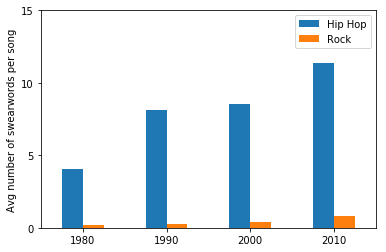

In [353]:
# Only continue with songs from 1980's and forth
g1 = g1.loc[g1['Year_decade'] >= 1980]

# Create bar plot 
import matplotlib.pyplot as plt 

g1 = g1[['Genre', 'Year_decade', 'Profanity_count']]

ax = g1.pivot('Year_decade','Genre',  'Profanity_count').plot(kind='bar')
#ax.set_title('Average number of swear words in a song \n by year and genre')
plt.ylabel('Avg number of swearwords per song')
plt.xlabel(None)
plt.xticks(rotation='horizontal')
plt.yticks(np.arange(0, 20, step=5))

plt.legend(loc=1)
plt.show()


# Most used words 

In [261]:
def count_per_song(list_of_strings, words_dictionary):
    for i in range(len(list_of_strings)): 
    
        if list_of_strings[i] in words_dictionary: 
            #print(word)
            words_dictionary[list_of_strings[i]] += 1
        else:
            words_dictionary[list_of_strings[i]] = 1
            
    return words_dictionary

In [262]:
hiphop_df = data1.loc[data1['Genre'] == 'Hip Hop']
pop_df = data1.loc[data1['Genre'] == 'Pop']
rock_df = data1.loc[data1['Genre'] == 'Rock']


hiphop = {}
word_count_hip = hiphop_df['Lyrics'].apply(count_per_song, args=[hiphop])
hiphop

rock = {}
word_count_rock = rock_df['Lyrics'].apply(count_per_song, args=[rock])
rock


{}

In [264]:
wordcount_hiphop_df = pd.DataFrame.from_dict(hiphop, orient='index')
wordcount_hiphop_df.columns = ['Count']

wordcount_rock_df = pd.DataFrame.from_dict(rock, orient='index')
wordcount_rock_df.columns = ['Count']


hiphop_sorted = wordcount_hiphop_df.sort_values(by=['Count'],ascending=False)
rock_sorted = wordcount_rock_df.sort_values(by=['Count'],ascending=False)


hiphop_sorted.head(15)
rock_sorted.head(15)



print(hiphop_sorted.head(15).to_latex())
print(rock_sorted.head(15).to_latex())


\begin{tabular}{lr}
\toprule
{} &  Count \\
\midrule
like  &   1498 \\
know  &   1305 \\
want  &    828 \\
love  &    828 \\
nigga &    765 \\
baby  &    685 \\
time  &    589 \\
let   &    580 \\
man   &    527 \\
come  &    523 \\
yes   &    516 \\
oh    &    513 \\
way   &    512 \\
girl  &    499 \\
tell  &    480 \\
\bottomrule
\end{tabular}



# Bigram

In [265]:
from collections import Counter
from nltk.util import ngrams 


#string_list = data['Lyrics'][100]

#text = "the quick person did not realize his speed and the quick person bumped "
#n_gram = 2
#bigram = Counter(ngrams(string_list, n_gram))


#bigram_df = pd.DataFrame.from_dict(bigram, orient='index')
#bigram_df.head(20)
#bigram_df.columns = ['Count']



#bigram_sorted = bigram_df.sort_values(by=['Count'],ascending=False)

#bigram_sorted.head(20)



In [268]:
#text = "the quick person did not realize his speed and the quick person bumped "
#n_gram = 2

#Counter(ngrams(text.split(), n_gram))


#hiphop = {}
#word_count_hip = hiphop_df['Lyrics'].apply(count_per_song, args=[hiphop])
#hiphop

In [269]:
#total_dictionary = Counter()

def bigram_song(list_of_strings, total_dictionary = Counter()):
    n_gram = 2

    song_dictionary = Counter(ngrams(list_of_strings, n_gram))
    
    total_dictionary += song_dictionary
    
    return total_dictionary  

In [271]:

bigram_hip = hiphop_df['Lyrics'].apply(bigram_song) #, args = [total_dictionary])

 

bigram_df = pd.DataFrame.from_dict(bigram_hip[0], orient='index').reset_index()
bigram_df.columns = ['bigram','Count']

bigram_sorted = bigram_df.sort_values(by=['Count'],ascending=False)

bigram_sorted.head(20)





,bigram,Count
6714,"(big, boy)",318
13362,"(lo, lo)",282
430,"(know, know)",262
1273,"(oh, oh)",256
3553,"(yes, yes)",256
643,"(da, da)",186
6044,"(want, want)",182
3149,"(love, love)",176
30223,"(ay, ay)",174
5473,"(la, la)",166


In [283]:
# Create a way to remove all bigrams that are the same two words 
#bigram_sorted['bigram_same'] = bigram_sorted['bigram'].apply([0] == [1])

TypeError: 'bool' object is not callable

In [280]:
#for i in range(len(bigram_sorted)):
#    bigram_sorted['bigram_same'] = [bigram_sorted['bigram'].apply([0] == [1]

KeyError: 'bigram_same'